In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike= pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- dropping unwanted rows 

In [4]:
bike=bike.drop(['instant','dteday','atemp','casual','registered'],axis=1)

In [5]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


- mapping categorical variables as per data dictionary

In [6]:
bike['season']= bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['mnth']=bike['mnth'].map({1:'january',2:'feburary',3:'march',4:'april',5:'may',6:'june',7:'july',8:'august',
                              9:'september',10:'october',11:'november',12:'december'})
bike['weekday']=bike['weekday'].map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})
bike['weathersit']=bike['weathersit'].map({1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,saturday,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


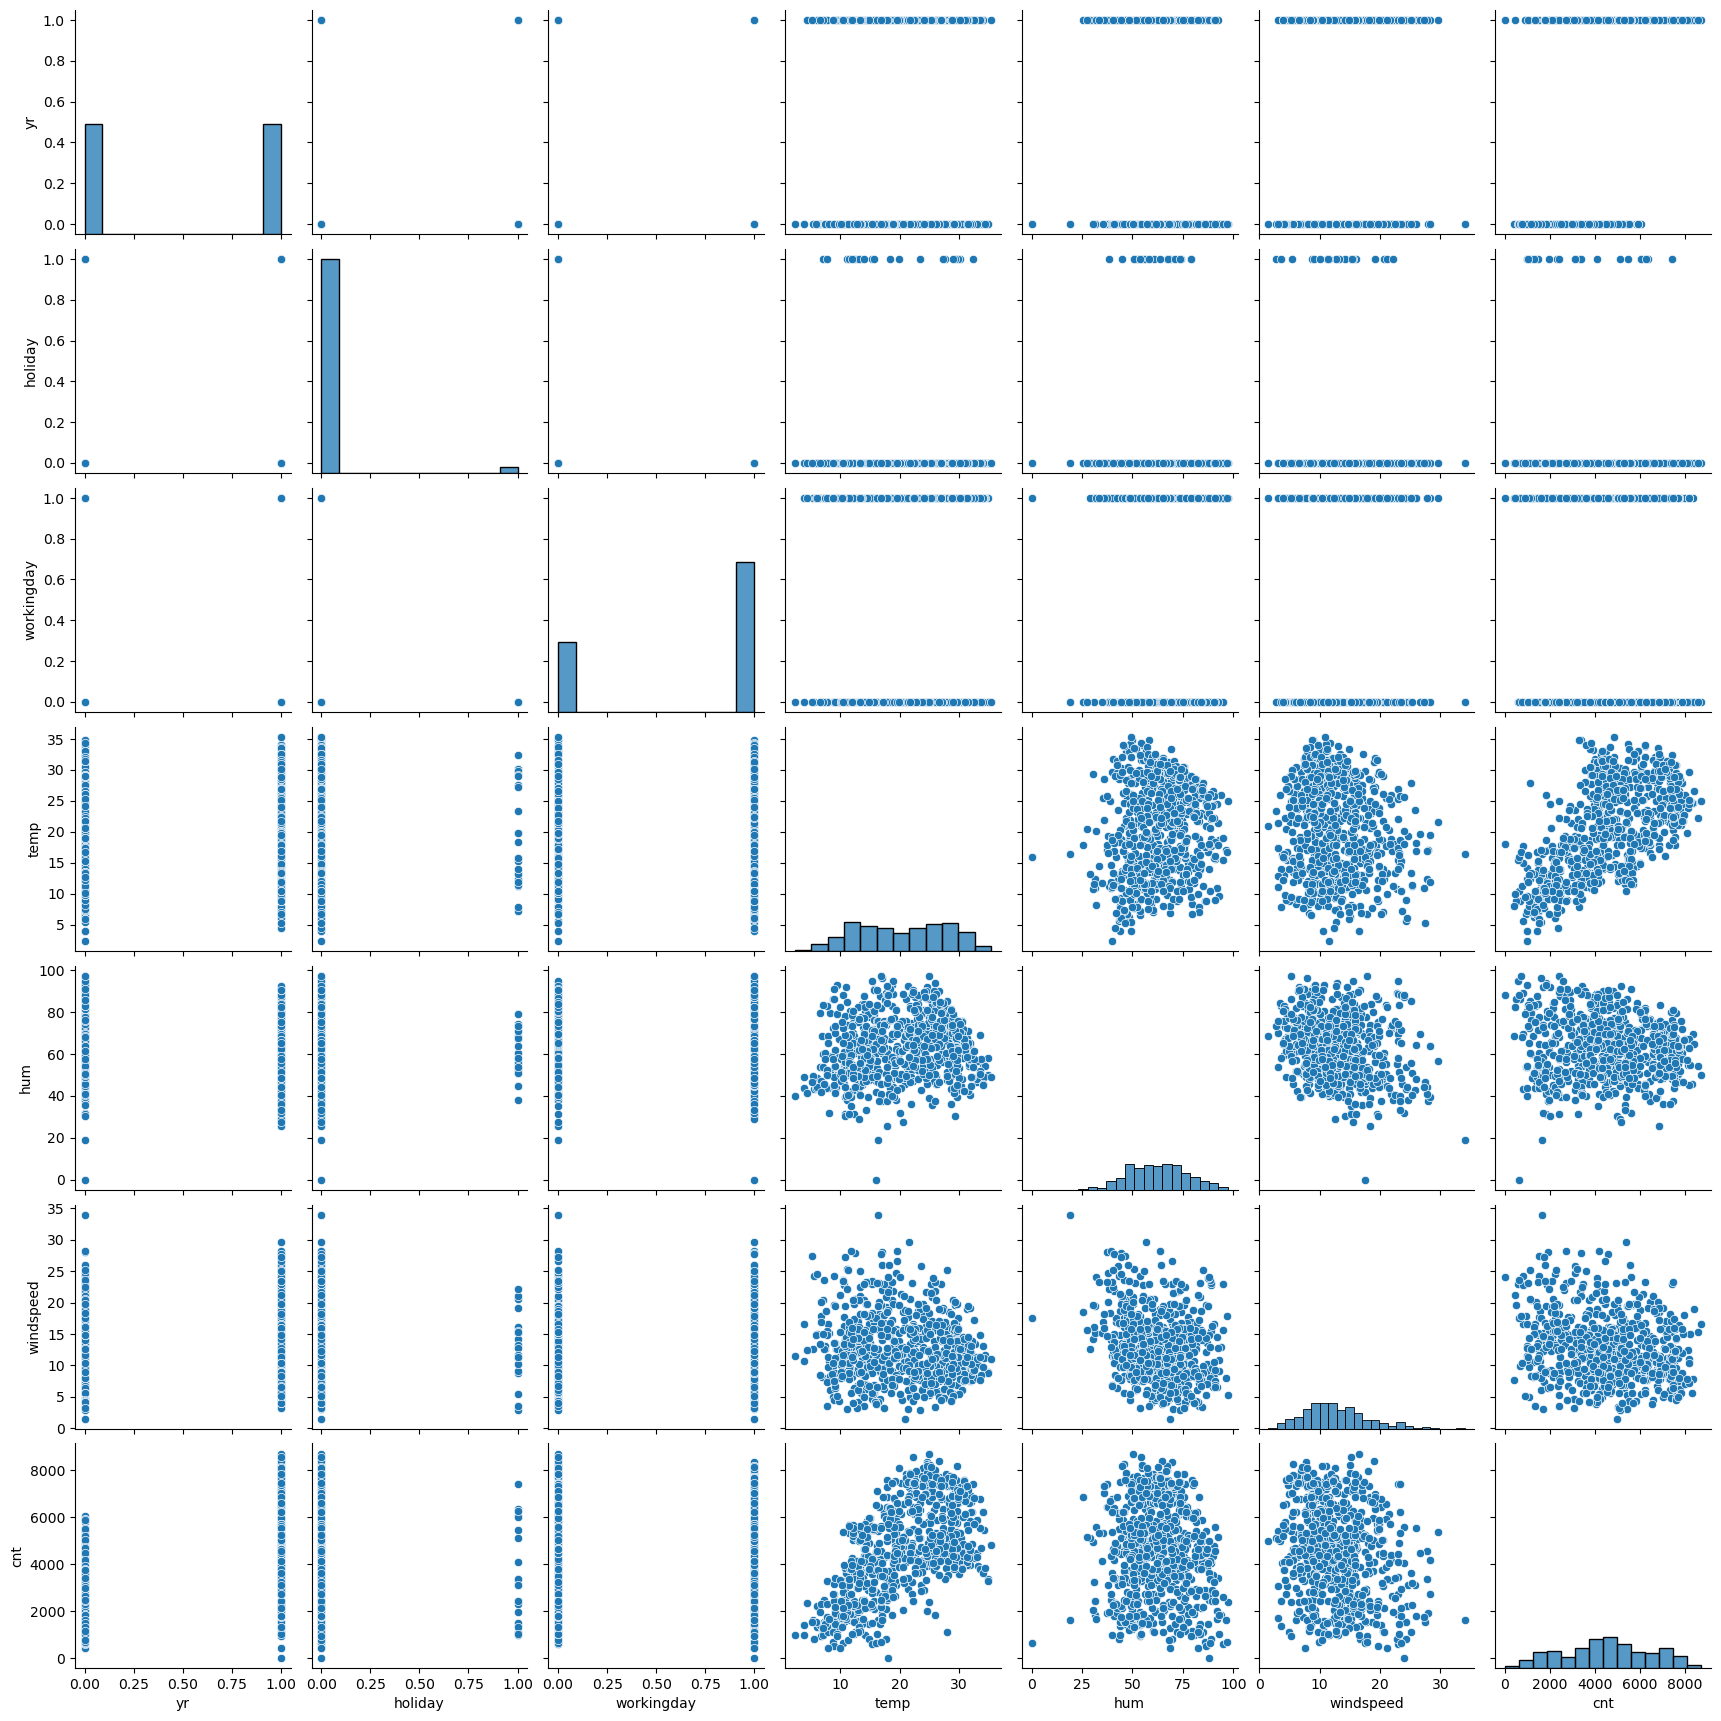

In [7]:
sns.pairplot(bike)
plt.show()

- pair plot shows maximum correlation is with temperature

<Axes: xlabel='weathersit', ylabel='cnt'>

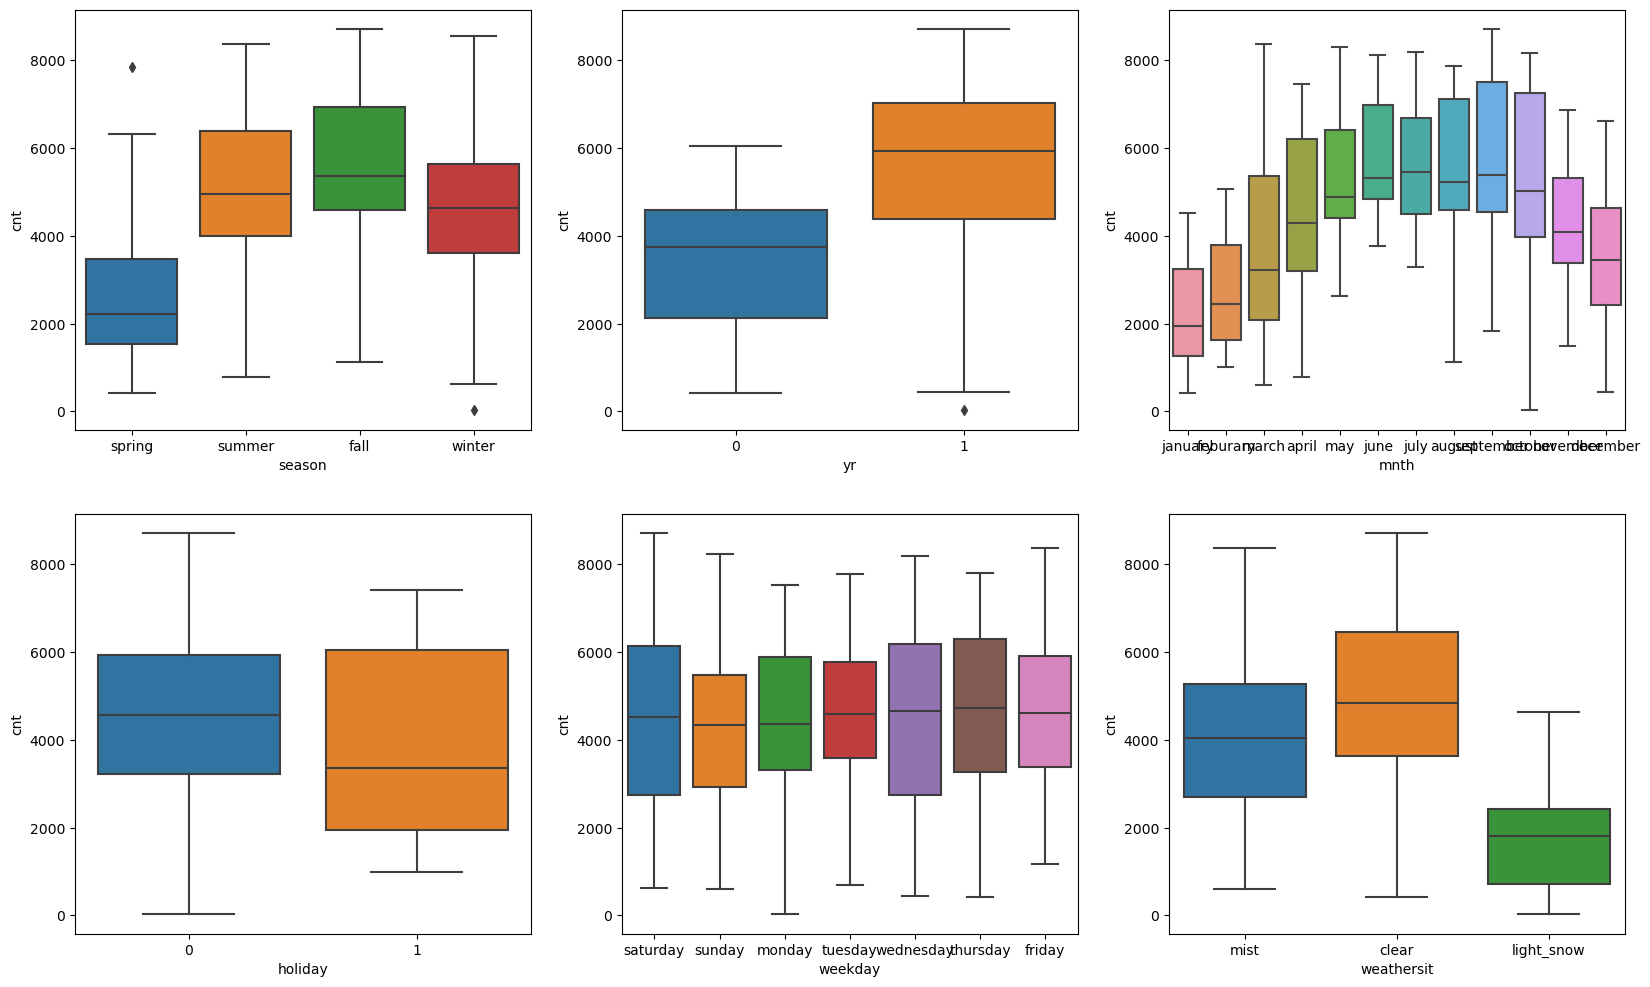

In [8]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=bike)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt', data=bike)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt', data=bike)

plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt', data=bike)

plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt', data=bike)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt', data=bike)

from above box plots we can infer that

- Season: we can infer that fall season has more bike bookings, followed by summer, winter and very less bookings in winter
- Year: we can infer that there are two years 2018 and 2019 bike bookings are increasing in 2019 as compared to 2018
- Month: we can infer that there are more number of bookings in August, September and October months
- Weekday: weekday doesn’t effect any bookings as there are same on the every day of the week
- Working day: we can infer that there are more number of booking on holiday than on working day
- Holiday: we can infer that there are more bookings in holiday
- weathersit: we can infer that there are more bookings on a clear day


### creating dummy varibales for categorical variables 

In [9]:
# creating dummy variable for season
status=pd.get_dummies(bike['season'], drop_first=True)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [10]:
# concact the dummy df to original df
bike= pd.concat([bike,status], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,january,0,saturday,0,mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,january,0,sunday,0,mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,january,0,monday,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,january,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,january,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [11]:
bike= bike.drop('season',axis=1)

In [12]:
# creating dummy variable for month
status=pd.get_dummies(bike['mnth'], drop_first=True)
status.head()

,august,december,feburary,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [13]:
# concact the dummy df to original df
bike= pd.concat([bike,status], axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,december,feburary,january,july,june,march,may,november,october,september
0,0,january,0,saturday,0,mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,january,0,sunday,0,mist,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,january,0,monday,1,clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,january,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,january,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [14]:
bike=bike.drop('mnth',axis=1)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,december,feburary,january,july,june,march,may,november,october,september
0,0,0,saturday,0,mist,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sunday,0,mist,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,monday,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# creating dummy variable for month
status=pd.get_dummies(bike['weekday'], drop_first=True)
status.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [16]:
# concact the dummy df to original df
bike= pd.concat([bike,status], axis=1)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,saturday,0,mist,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,sunday,0,mist,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,monday,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
bike=bike.drop('weekday',axis=1)
bike.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,november,october,september,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
status=pd.get_dummies(bike['weathersit'], drop_first= True)
status.head()

,light_snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [19]:
bike=pd.concat([bike,status],axis=1)
bike.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist
0,0,0,0,mist,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,mist,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
bike= bike.drop('weathersit',axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
df_train, df_test= train_test_split(bike, train_size=0.70, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Scaling the variables to get good value for coeficients

In [22]:
scaler= MinMaxScaler()

num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

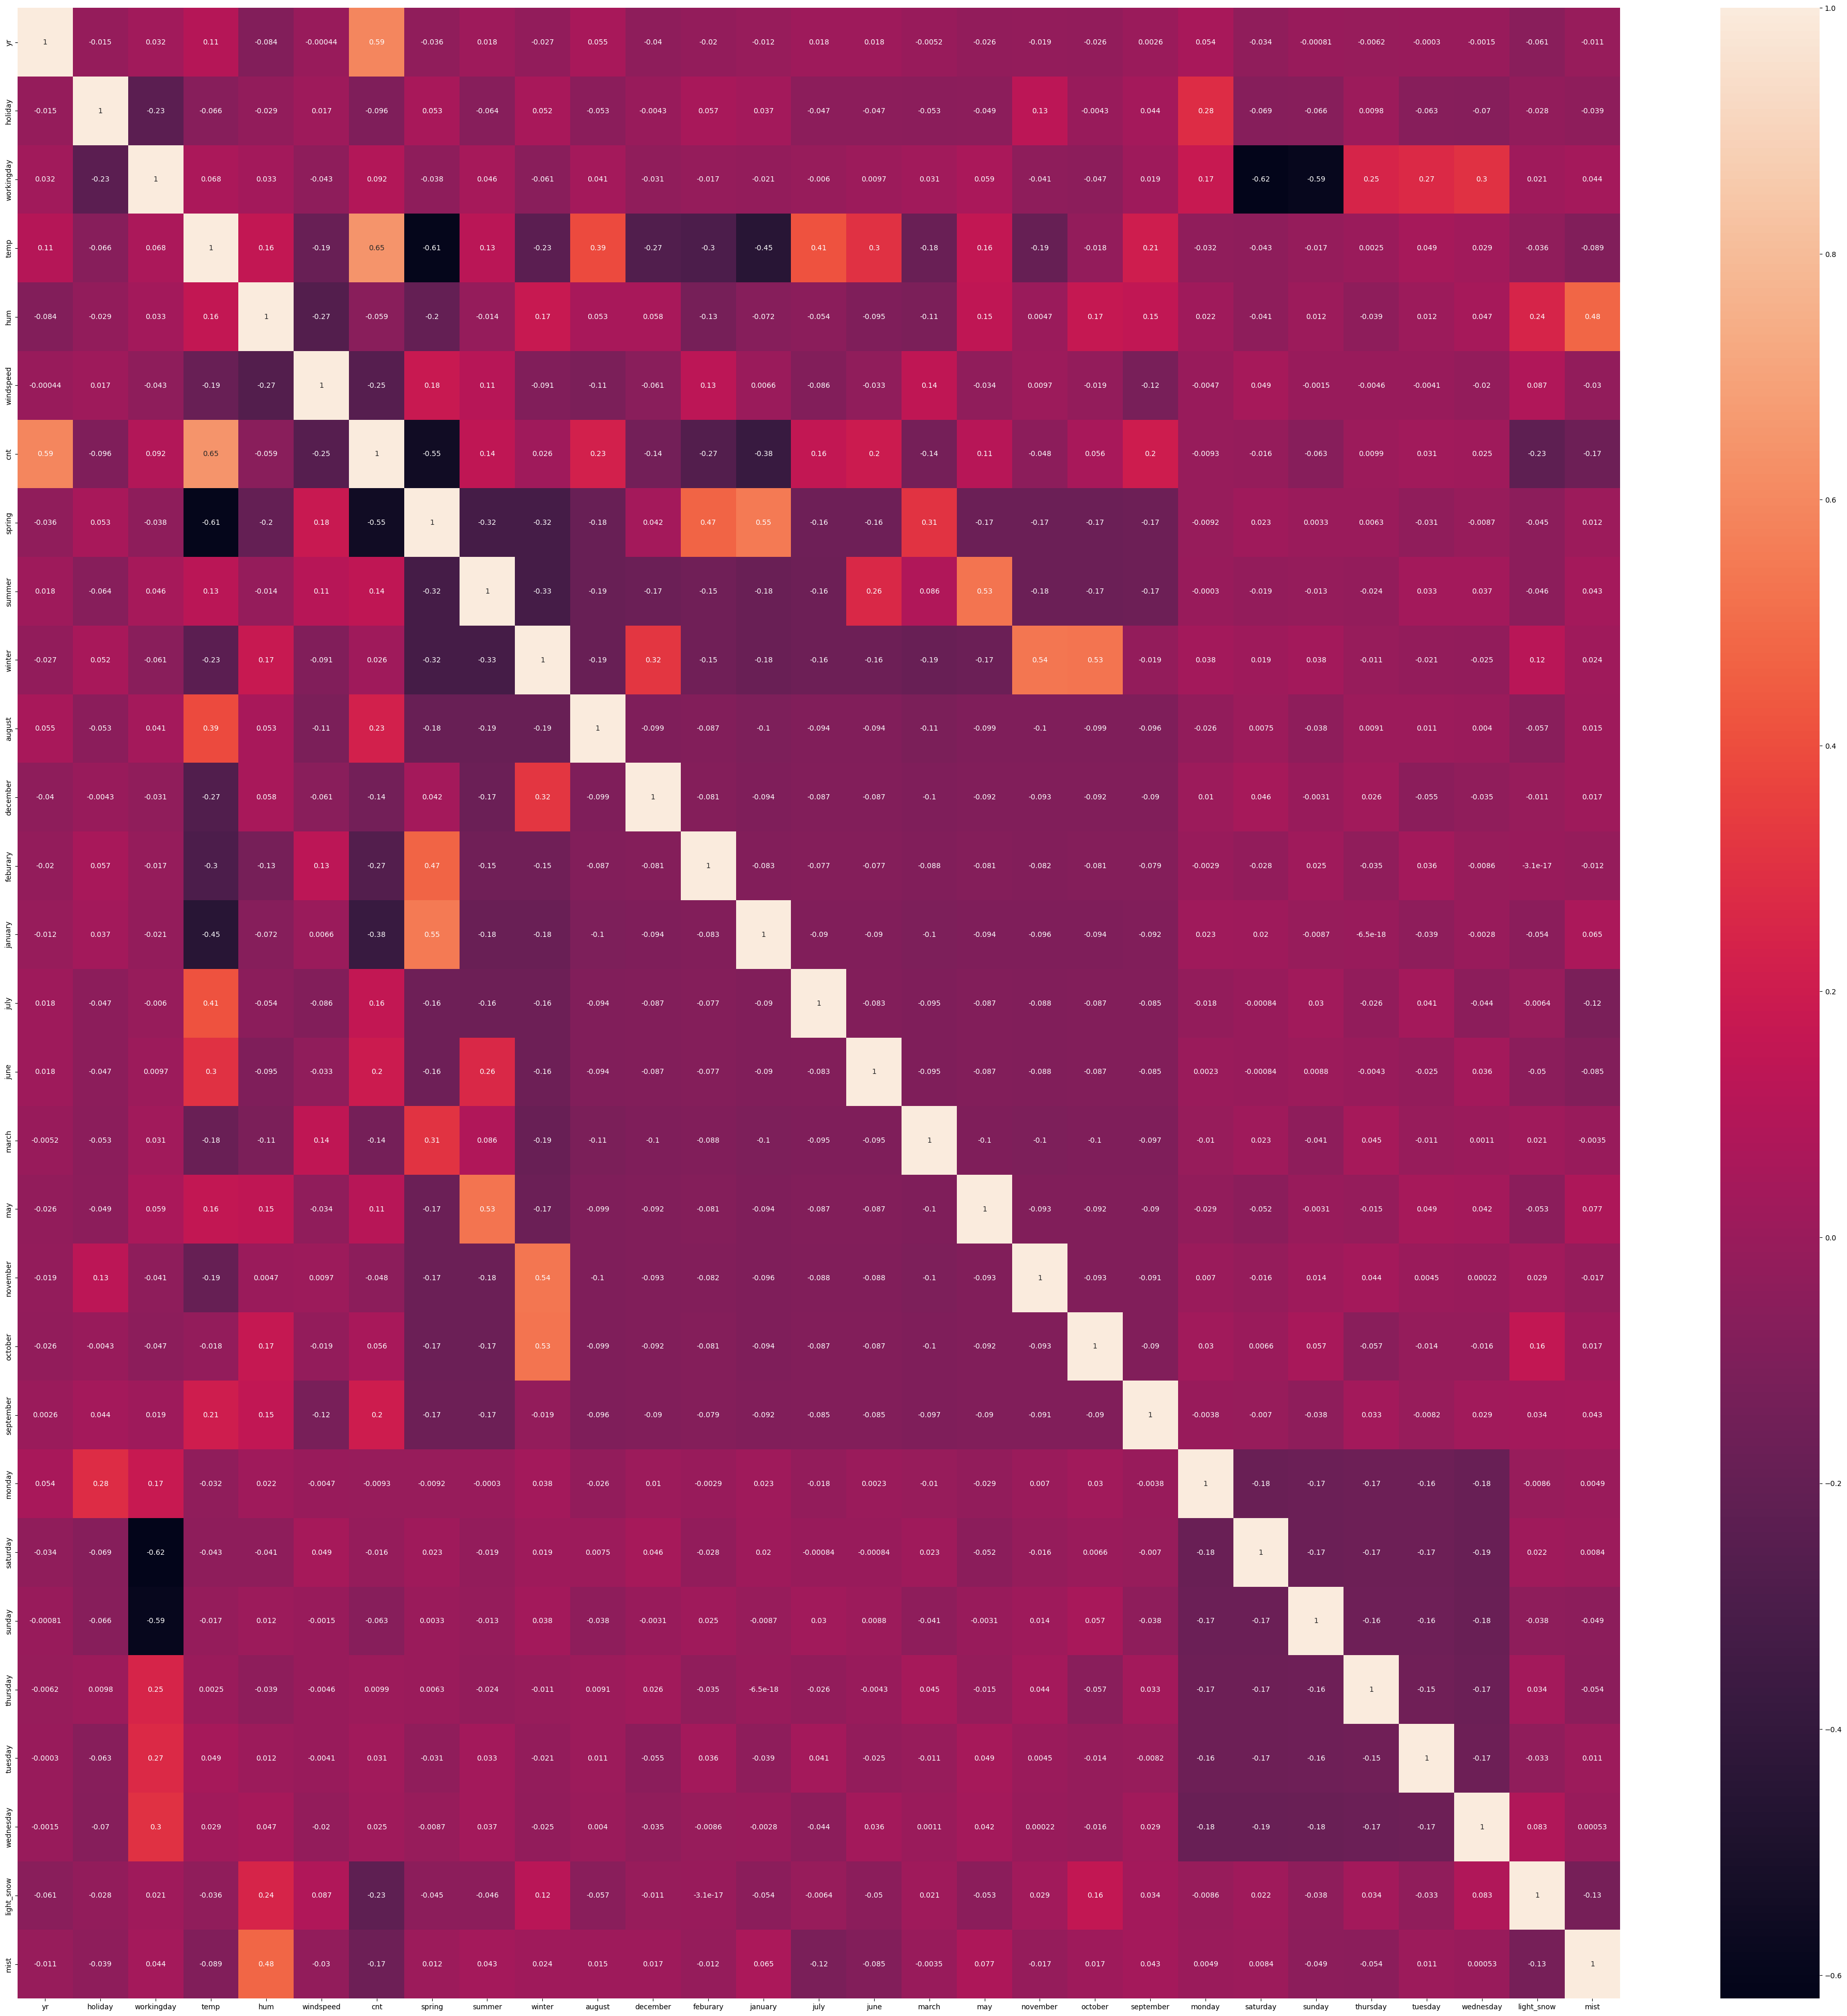

In [24]:
plt.figure(figsize=(50,50))
sns.heatmap(df_train.corr(),annot=True)
plt.show

In [25]:
y_train=df_train.pop('cnt')
X_train=df_train

### Feature selection by using RFE(Recursive Feature Elimination)

In [26]:
lm= LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('august', False, 8),
 ('december', False, 5),
 ('feburary', False, 6),
 ('january', False, 3),
 ('july', True, 1),
 ('june', False, 12),
 ('march', False, 15),
 ('may', False, 7),
 ('november', False, 4),
 ('october', False, 11),
 ('september', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 13),
 ('tuesday', False, 10),
 ('wednesday', False, 14),
 ('light_snow', True, 1),
 ('mist', True, 1)]

- From RFE we can eliminate [summer,august,december,feburary,january,june,march,may,november,october,monday,thursday,tuesday,
                            wednesday,] these features

In [28]:
fe_var=['yr','holiday','workingday','temp','hum','windspeed','spring','winter','july','september','saturday','sunday',
       'light_snow','mist']

In [29]:
X_train=X_train[fe_var]

In [30]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,july,september,saturday,sunday,light_snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,1,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,0,0,1


### creating a model by using statsmodel 

In [31]:
# adding constant
X_train_sm=sm.add_constant(X_train)

#create a first model
lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          9.38e-190
Time:                        15:49:27   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2435      0.025      9.653      0.000       0.194       0.293
yr             0.2308      0.008     28.455      0.000       0.215       0.247
holiday       -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday     0.0948      0.009     10.227      0.000       0.077       0.113
temp           0.4776      0.031     15.613      0.000       0.418       0.538
hum           -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed     -0.1687      0.025     -6.616      0.000      -0.219      -0.119
spring        -0.1080      0.015     -7.280      0.000      -0.137      -0.079
winter         0.0558      0.012      4.528      0.000       0.032       0.080
july          -0.0782      0.017     -4.571      0.000      -0.112      -0.045
september      0.0591      0.015      3.829      0.000       0.029       0.089
saturday       0.1046      0.011      9.177      0.000       0.082       0.127
sunday         0.0521      0.012      4.349      0.000       0.029       0.076
light_snow    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
mist          -0.0578      0.011     -5.501      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     1.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i  in range(X_train.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
2,workingday,40.65
10,saturday,9.92
11,sunday,9.64
3,temp,2.99
6,spring,2.55
1,holiday,2.54
4,hum,1.89
7,winter,1.78
13,mist,1.57
8,july,1.30


In [33]:
# droping holiday variable
X=X_train.drop('holiday', axis=1)

In [34]:
X_train_sm= sm.add_constant(X)

lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          9.38e-190
Time:                        15:51:45   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.040      5.915      0.000       0.157       0.314
yr             0.2308      0.008     28.455      0.000       0.215       0.247
workingday     0.1028      0.026      4.001      0.000       0.052       0.153
temp           0.4776      0.031     15.613      0.000       0.418       0.538
hum           -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed     -0.1687      0.025     -6.616      0.000      -0.219      -0.119
spring        -0.1080      0.015     -7.280      0.000      -0.137      -0.079
winter         0.0558      0.012      4.528      0.000       0.032       0.080
july          -0.0782      0.017     -4.571      0.000      -0.112      -0.045
september      0.0591      0.015      3.829      0.000       0.029       0.089
saturday       0.1125      0.027      4.146      0.000       0.059       0.166
sunday         0.0601      0.027      2.203      0.028       0.006       0.114
light_snow    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
mist          -0.0578      0.011     -5.501      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
3,hum,29.19
2,temp,17.25
1,workingday,16.91
9,saturday,4.57
4,windspeed,4.52
10,sunday,4.45
5,spring,2.79
12,mist,2.28
6,winter,2.14
0,yr,2.08


In [36]:
#droping hum variable
X=X.drop('hum', axis=1)

In [37]:
X_train_sm= sm.add_constant(X)

lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.26e-187
Time:                        15:52:36   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1553      0.035      4.475      0.000       0.087       0.224
yr             0.2344      0.008     28.661      0.000       0.218       0.250
workingday     0.1034      0.026      3.967      0.000       0.052       0.155
temp           0.4493      0.030     14.895      0.000       0.390       0.509
windspeed     -0.1404      0.025     -5.657      0.000      -0.189      -0.092
spring        -0.1118      0.015     -7.441      0.000      -0.141      -0.082
winter         0.0468      0.012      3.808      0.000       0.023       0.071
july          -0.0711      0.017     -4.120      0.000      -0.105      -0.037
september      0.0559      0.016      3.573      0.000       0.025       0.087
saturday       0.1148      0.028      4.171      0.000       0.061       0.169
sunday         0.0578      0.028      2.089      0.037       0.003       0.112
light_snow    -0.2907      0.025    -11.824      0.000      -0.339      -0.242
mist          -0.0816      0.009     -9.366      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       64.352   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.995
Skew:                          -0.644   Prob(JB):                     4.04e-36
Kurtosis:                       5.452   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
8,saturday,3.77
9,sunday,3.54
4,spring,2.44
0,yr,2.07
5,winter,1.78
11,mist,1.58
6,july,1.37


In [39]:
#droping workingday variable
X=X.drop('workingday', axis=1)

In [40]:
X_train_sm= sm.add_constant(X)

lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.84e-185
Time:                        15:54:09   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2558      0.024     10.619      0.000       0.208       0.303
yr             0.2349      0.008     28.308      0.000       0.219       0.251
temp           0.4502      0.031     14.711      0.000       0.390       0.510
windspeed     -0.1425      0.025     -5.661      0.000      -0.192      -0.093
spring        -0.1148      0.015     -7.539      0.000      -0.145      -0.085
winter         0.0435      0.012      3.497      0.001       0.019       0.068
july          -0.0704      0.017     -4.024      0.000      -0.105      -0.036
september      0.0521      0.016      3.289      0.001       0.021       0.083
saturday       0.0154      0.012      1.332      0.184      -0.007       0.038
sunday        -0.0415      0.012     -3.468      0.001      -0.065      -0.018
light_snow    -0.2860      0.025    -11.478      0.000      -0.335      -0.237
mist          -0.0797      0.009     -9.026      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       77.949   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.347
Skew:                          -0.755   Prob(JB):                     3.47e-46
Kurtosis:                       5.752   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.04
0,yr,2.06
3,spring,1.66
10,mist,1.52
4,winter,1.41
5,july,1.35
7,saturday,1.22
8,sunday,1.21
6,september,1.20


In [42]:
#droping saturday variable
X=X.drop('saturday', axis=1)

In [43]:
X_train_sm= sm.add_constant(X)

lr=sm.OLS(y_train, X_train_sm)

lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          2.75e-186
Time:                        15:54:43   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2586      0.024     10.768      0.000       0.211       0.306
yr             0.2346      0.008     28.259      0.000       0.218       0.251
temp           0.4493      0.031     14.674      0.000       0.389       0.509
windspeed     -0.1410      0.025     -5.603      0.000      -0.191      -0.092
spring        -0.1147      0.015     -7.528      0.000      -0.145      -0.085
winter         0.0438      0.012      3.522      0.000       0.019       0.068
july          -0.0698      0.018     -3.986      0.000      -0.104      -0.035
september      0.0522      0.016      3.291      0.001       0.021       0.083
sunday        -0.0443      0.012     -3.760      0.000      -0.067      -0.021
light_snow    -0.2859      0.025    -11.462      0.000      -0.335      -0.237
mist          -0.0797      0.009     -9.018      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       73.106   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.558
Skew:                          -0.694   Prob(JB):                     2.31e-45
Kurtosis:                       5.784   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i  in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending= False)
vif

,Features,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,spring,1.64
9,mist,1.52
4,winter,1.40
5,july,1.35
6,september,1.20
7,sunday,1.17
8,light_snow,1.08


### scaling test dataset

In [45]:
# scaling test dataset
num_vars=['temp','hum','windspeed','cnt']

df_test[num_vars]= scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
y_test=df_test.pop('cnt')
X_test= df_test

In [47]:
X_test_sm = sm.add_constant(X_test)

In [48]:
X_test_sm= X_test_sm[['const','yr','temp','windspeed','spring','winter','july','september','sunday','light_snow','mist']]

In [49]:
y_test_pred= lr_model.predict(X_test_sm)

In [50]:
print(r2_score(y_true= y_test, y_pred= y_test_pred))

0.8091992919519853


### Conclusions:

- we can infer that model train r2 score is 0.832 and test r2 score is 0.81 which is in acceptable range so we can tell that this model explains the dataset in better way

### Validating the assumptions of the linear regression model

- Residuals should be uniformly distribured
- no correlation between rediuals and train dataset

<Axes: ylabel='Count'>

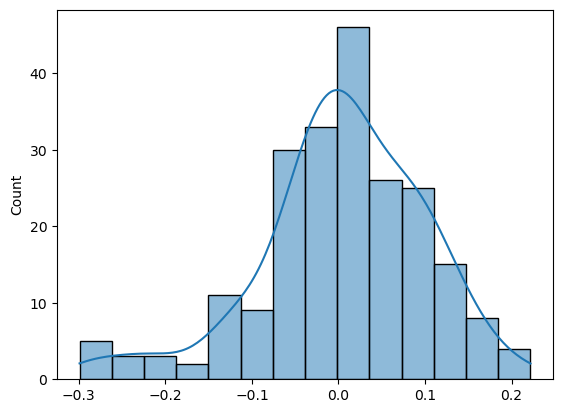

In [52]:
res= y_test- y_test_pred
sns.histplot(res, kde= True)

- we can see that the residuals are normally distributed

Based on the final model we can say top 3 features contributing significantly towards explaining the demand of the shared bikes year, temp and light_snow in weather

- As year increases the shared bike demand increases at the rate of 0.235 i.e., for a unit increase in the year the bike demand increases by 0.235.
- As temp increases the shared bike demand increase at the rate of 0.449 i.e., for a unit increase in the temp the bike demand increase by 0.449.
- As light_snow in weather increases the shared bike demand decreases at the rate of 0.286 i.e., for a unit increase in windspeed the bike demand decreases by 0.286.


### Final linear Equation

- cnt=0.259+0.235*(yr)+0.449*(temp)-0.141*(windspeed)-0.115*(spring)+0.044*(winter)-0.070*(july)+0.053*(september)-0.044*(sunday)
      -0.286*(light_snow)-0.080*(mist)